## Task 2 - Movie Rating Prediction with Python.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("IMDbMovies.csv", encoding='ISO-8859-1')

In [3]:
data.shape

(15509, 10)

In [4]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
#Total null values
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
# Drop null values of column Year and Genre
data.dropna(subset=['Year'],inplace=True)
data.dropna(subset=['Genre'],inplace=True)

In [8]:
#remove 'min' from Duration column and convert data type to numeric
data['Duration']= data['Duration'].str.replace('min','').apply(pd.to_numeric)

In [9]:
#Remove commas and replace $5.16M with integer value
data["Votes"]=data["Votes"].replace("$5.16M", 516)
data["Votes"] = pd.to_numeric(data['Votes'].str.replace(',',''))

In [10]:
#replacing null values with the average rating
data['Rating'].fillna(data['Rating'].mean(),inplace=True)

#replacing null values with average duration
data['Duration'].fillna(data['Duration'].mean(),inplace=True)

#replacing null values with average votes
data['Votes'].fillna(data['Votes'].mean(),inplace=True)

In [11]:
#covert datatype of Year from object to float
data['Year'] = data['Year'].str.extract('(\d+)').astype(float)

In [12]:
#Find duplicate values
data.duplicated().sum()

4

In [13]:
#Remove duplicate values
data.drop_duplicates(inplace=True)

In [14]:
data.isnull().sum()

Name           0
Year           0
Duration       0
Genre          0
Rating         0
Votes          0
Director     480
Actor 1     1110
Actor 2     1537
Actor 3     2051
dtype: int64

In [15]:
data.dropna(inplace=True)

In [16]:
data.shape

(11085, 10)

In [17]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11085 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11085 non-null  object 
 1   Year      11085 non-null  float64
 2   Duration  11085 non-null  float64
 3   Genre     11085 non-null  object 
 4   Rating    11085 non-null  float64
 5   Votes     11085 non-null  float64
 6   Director  11085 non-null  object 
 7   Actor 1   11085 non-null  object 
 8   Actor 2   11085 non-null  object 
 9   Actor 3   11085 non-null  object 
dtypes: float64(4), object(6)
memory usage: 952.6+ KB


In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,11085.0,1991.653766,21.810313,1917.0,1976.000000,1995.000000,2011.000000,2022.0
Duration,11085.0,129.890434,20.311040,21.0,128.193162,128.193162,137.000000,321.0
Rating,11085.0,5.820176,1.129857,1.1,5.400000,5.839568,6.400000,10.0
Votes,11085.0,2008.289609,9800.123597,5.0,31.000000,382.000000,1963.643981,591417.0


### Year with best rating

In [20]:
avg_rating_year_wise = data.groupby('Year')['Rating'].mean().reset_index()

best_year = avg_rating_year_wise.loc[avg_rating_year_wise['Rating'].idxmax()]
print(f"The year with the best average rating is {int(best_year['Year'])} with a rating of {best_year['Rating']:.2f}")

The year with the best average rating is 1917 with a rating of 6.70


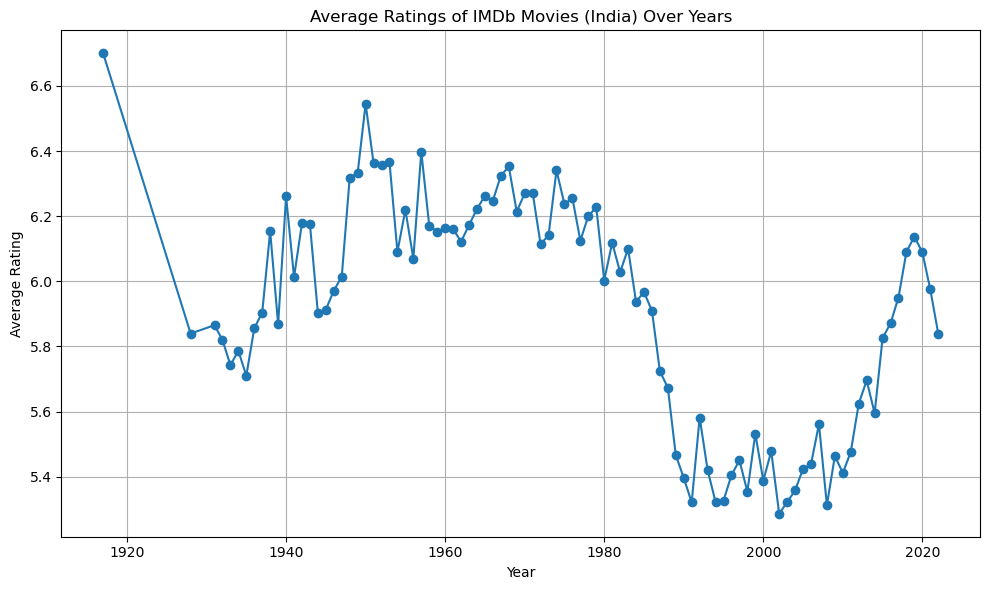

In [21]:
# Average rating year wise plot
plt.figure(figsize=(10,6))
plt.plot(avg_rating_year_wise['Year'], avg_rating_year_wise['Rating'], marker='o', linestyle='-')
plt.title('Average Ratings of IMDb Movies (India) Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

### Impact of duration of movie on ratings

In [22]:
# Correlation between Duration and Ratings
correlation = data['Duration'].corr(data['Rating'])
print(f"Correlation between Duration and Rating: {correlation:.2f}")

Correlation between Duration and Rating: 0.01


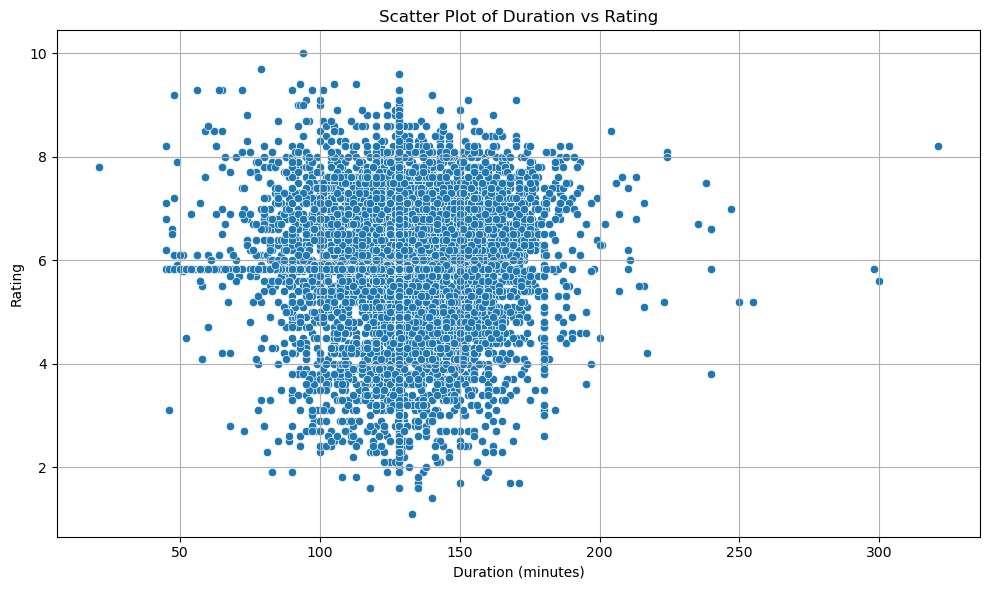

In [23]:
# Scatter plot to see the distribution of ratings across different durations.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Rating', data=data)
plt.title('Scatter Plot of Duration vs Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

### Top Movies

In [24]:
# Top 10 movies according to Ratings
top_movies = data.sort_values(by='Rating', ascending=False)
print(top_movies[['Name', 'Rating']].head(10))

                      Name  Rating
8339       Love Qubool Hai    10.0
5410            Half Songs     9.7
2563                 Breed     9.6
5077          Gho Gho Rani     9.4
6852                  June     9.4
14222  The Reluctant Crime     9.4
5125           God of gods     9.3
12673   Secrets of Sinauli     9.3
8344          Love Sorries     9.3
9105                 Meher     9.3


In [25]:
# Top movies with ratings>=8.0
popular_movies = data[data['Rating'] >= 8.0]

# Number of popular movies released each year
popular_movies_per_year = popular_movies.groupby('Year').size().reset_index(name='Number of Popular Movies')

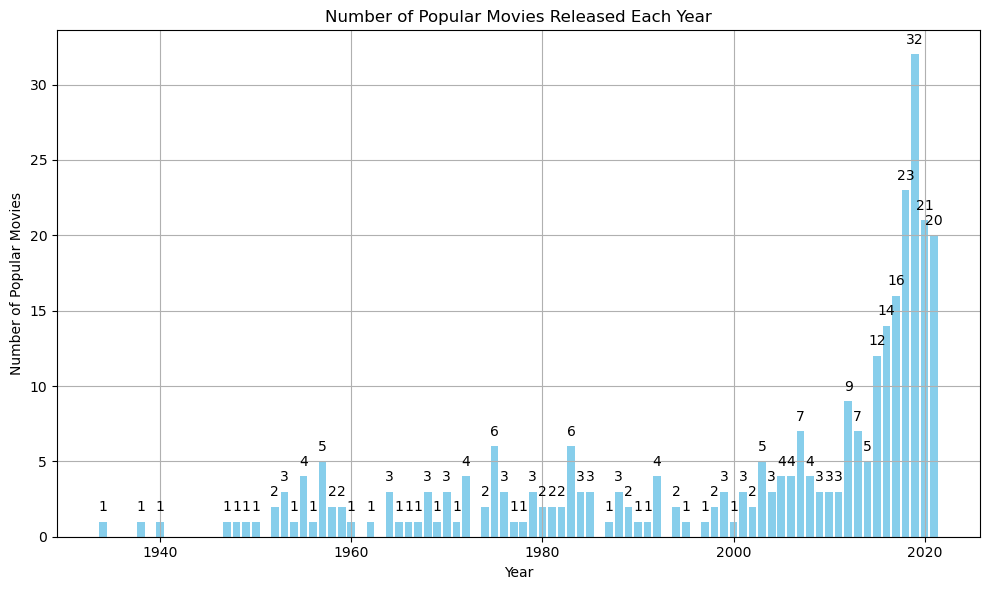

In [26]:
# Popular movies per Year plot
plt.figure(figsize=(10, 6))
plt.bar(popular_movies_per_year['Year'], popular_movies_per_year['Number of Popular Movies'], color='skyblue')
plt.title('Number of Popular Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Popular Movies')
plt.grid(True)
plt.tight_layout()

for i, value in enumerate(popular_movies_per_year['Number of Popular Movies']):
    plt.text(popular_movies_per_year['Year'][i], value + 0.5, str(value), ha='center', va='bottom')

plt.show()

### Total votes for top rated movies 

In [27]:
# No. of votes top rated movies achieved
top_rated_movies = data.groupby('Year').apply(lambda x: x.nlargest(1, 'Rating')).reset_index(drop=True)

# Total votes for top rated movies per year
total_votes_top_rated = top_rated_movies.groupby('Year')['Votes'].sum().reset_index()

print("\nTotal number of votes for top rated movies per year:")
print(total_votes_top_rated)


Total number of votes for top rated movies per year:
      Year        Votes
0   1917.0    22.000000
1   1928.0  1963.643981
2   1931.0    12.000000
3   1932.0    12.000000
4   1933.0    37.000000
..     ...          ...
89  2018.0     7.000000
90  2019.0    47.000000
91  2020.0     5.000000
92  2021.0     7.000000
93  2022.0  1963.643981

[94 rows x 2 columns]


In [28]:
# Total votes for top rated movies overall
top_rated_movies_overall = data.sort_values(by='Rating', ascending=False)

total_votes_sum = top_rated_movies_overall['Votes'].sum()
print(f"Total number of votes for top rated movies overall: {total_votes_sum}")

Total number of votes for top rated movies overall: 22261890.321222976


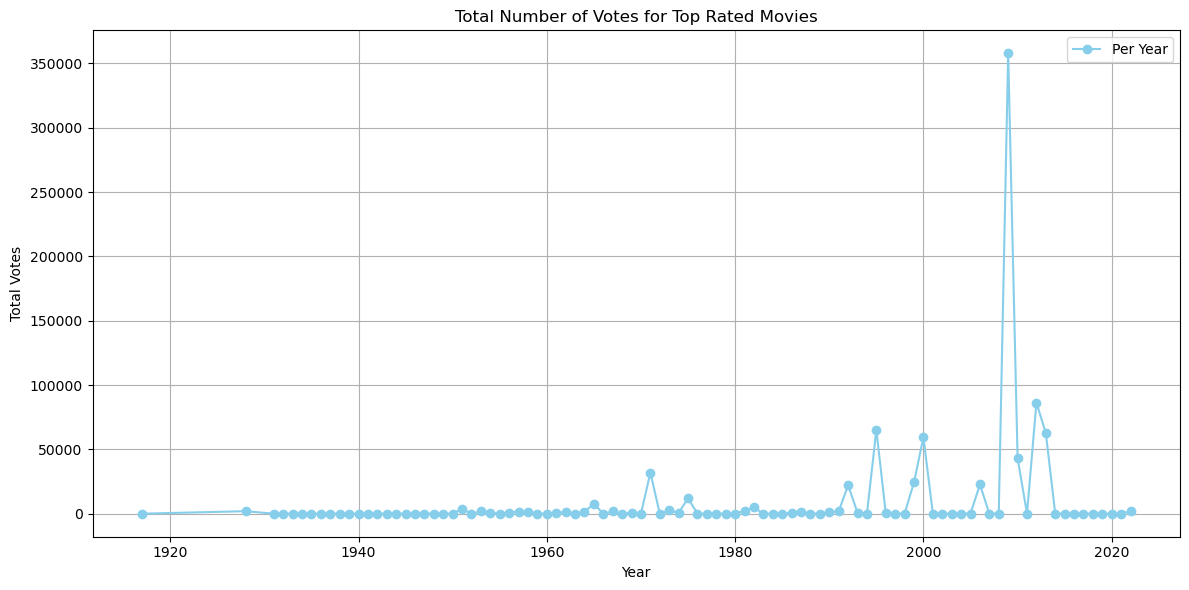

In [29]:
# Total votes for top rated movies year wise plot
plt.figure(figsize=(12, 6))

plt.plot(total_votes_top_rated['Year'], total_votes_top_rated['Votes'], marker='o', linestyle='-', color='skyblue', label='Per Year')

plt.title('Total Number of Votes for Top Rated Movies')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Director with most movies

In [30]:
# No. of movies directed by each director
director_movie_counts = data['Director'].value_counts()
director_movie_counts

Director
Kanti Shah              50
Mahesh Bhatt            46
David Dhawan            43
Hrishikesh Mukherjee    42
B.R. Ishara             40
                        ..
Satyabhan Sinha          1
Partho Sen-Gupta         1
Sudarshan Babbar         1
Vijay Chauhan            1
Ved Prakash              1
Name: count, Length: 4530, dtype: int64

In [31]:
# Director with most movies
most_movies_director = director_movie_counts.idxmax()
num_movies_directed = director_movie_counts.max()
print(f"The director who directed the most movies is '{most_movies_director}' with {num_movies_directed} movies.")

The director who directed the most movies is 'Kanti Shah' with 50 movies.


### Actor with most movies

In [32]:
# Count occurrences of each actor
all_actors = pd.concat([data['Actor 1'], data['Actor 2'], data['Actor 3']])

actor_counts = all_actors.value_counts()
actor_counts

Mithun Chakraborty    240
Dharmendra            228
Ashok Kumar           210
Jeetendra             179
Amitabh Bachchan      171
                     ... 
Sameer Deshpande        1
Jatin Negi              1
Monika Himachali        1
Sunny Wayne             1
Valerie Agha            1
Name: count, Length: 8916, dtype: int64

In [33]:
most_movies_actor = actor_counts.idxmax()
num_movies_starred = actor_counts.max()

print(f"The actor who starred in the most movies is '{most_movies_actor}' with {num_movies_starred} movies.")

The actor who starred in the most movies is 'Mithun Chakraborty' with 240 movies.


In [34]:
df = pd.DataFrame(data)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.preprocessing import FunctionTransformer

In [36]:
# Function to encode Categorical columns
def target_mean_encoding(df, target_col, cols_to_encode):
    for col in cols_to_encode:
        mean_encoded_col = df.groupby(col)[target_col].transform('mean')
        df[col + '_encoded'] = mean_encoded_col
    return df

In [37]:
target_col = 'Rating'
cols_to_encode = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

transformer = FunctionTransformer(target_mean_encoding, kw_args={'target_col': target_col, 'cols_to_encode': cols_to_encode})
df = transformer.transform(df)

In [38]:
# Scaling
scaler = StandardScaler()
num_cols = ['Year', 'Votes', 'Duration']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [39]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_encoded,Director_encoded,Actor 1_encoded,Actor 2_encoded,Actor 3_encoded
1,#Gadhvi (He thought he was Gandhi),1.253878,-1.028572,Drama,7.000000,-0.204118,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.111643,7.000000,6.850000,7.000000,7.000000
2,#Homecoming,1.345582,-1.964066,"Drama, Musical",5.839568,-0.004556,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,6.390447,5.839568,6.419784,6.846523,5.839568
3,#Yaaram,1.253878,-0.979336,"Comedy, Romance",4.400000,-0.201363,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.715623,4.400000,5.420000,4.400000,4.450000
4,...And Once Again,0.841210,-1.225519,Drama,5.839568,-0.004556,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,6.111643,6.262795,6.806595,5.764348,5.546523
5,...Aur Pyaar Ho Gaya,0.245135,0.842416,"Comedy, Drama, Musical",4.700000,-0.120544,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.224490,5.358824,4.788889,5.786667,5.781247


In [40]:
X = df[['Year', 'Votes', 'Duration', 'Genre_encoded', 'Director_encoded', 'Actor 1_encoded', 'Actor 2_encoded', 'Actor 3_encoded']]
y = df['Rating']
print(X.shape)
print(y.shape)

(11085, 8)
(11085,)


In [41]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9976, 8)
(9976,)
(1109, 8)
(1109,)


In [42]:
# Modeling and fitting
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [43]:
# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2 Score): {r2:.2f}')

Mean Squared Error (MSE): 0.36
Root Mean Squared Error (RMSE): 0.60
Mean Absolute Error (MAE): 0.43
R-squared (R2 Score): 0.72
